# Первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
!wget https://raw.githubusercontent.com/Falconwatch/DeepLearning_Autumn22/main/week01/data/data.csv

--2022-10-18 09:25:54--  https://raw.githubusercontent.com/Falconwatch/DeepLearning_Autumn22/main/week01/data/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 446068 (436K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>] 435.61K  --.-KB/s    in 0.005s  

2022-10-18 09:25:54 (88.6 MB/s) - ‘data.csv’ saved [446068/446068]



In [7]:
df = pd.read_csv('data.csv',index_col=0)

Как и в любой задаче машинного обучения для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?


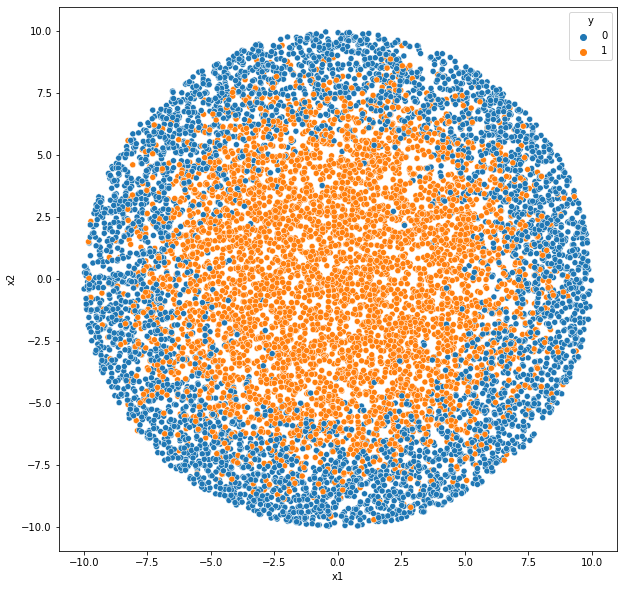

In [11]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [12]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# разобьем выборку на трэйн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size = 0.33)

Точность нашей модели 0.5984848484848485


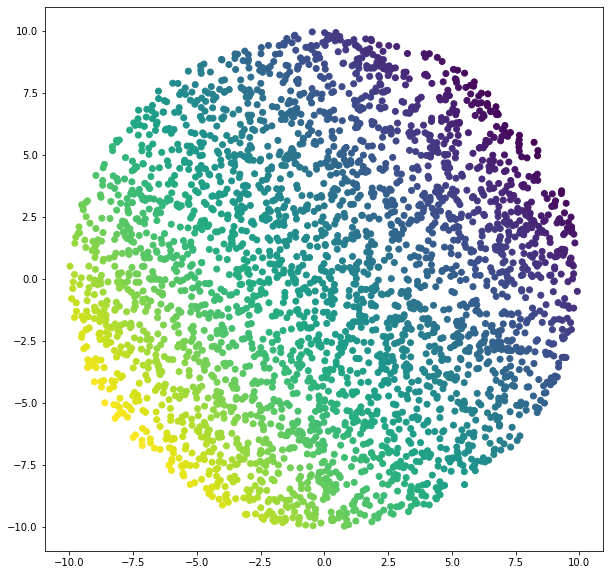

In [14]:
from sklearn.linear_model import LogisticRegression


#########################################
# Ваш код для Логистической регрессии
basic_logreg = LogisticRegression()
basic_logreg.fit(X_train, y_train)


predict_logit =  basic_logreg.predict(X_test)
predict_log_proba = [p[0] for p in basic_logreg.predict_proba(X_test)]

#########################################


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(10, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_log_proba)
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Точность нашей модели 0.8309090909090909


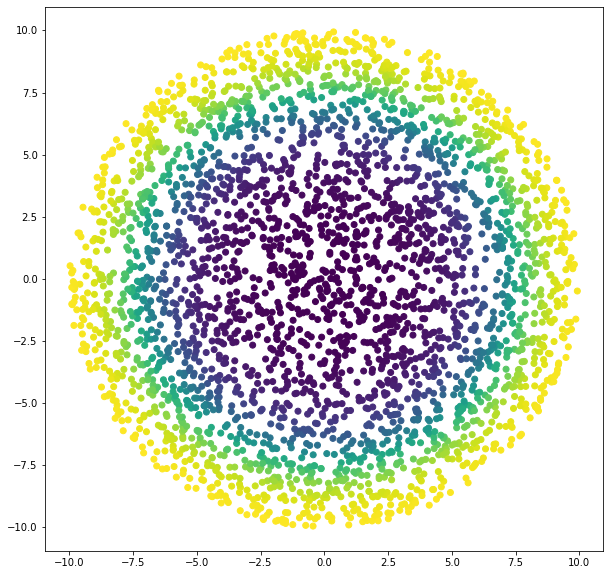

In [18]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

df_new['new_feature_1'] = df_new["x1"]**2
df_new['new_feature_2'] = df_new["x2"]**2

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 
                                                                            'new_feature_1', 'new_feature_2']],
                                                                    df_new['y'], test_size = 0.33)

adv_logreg = LogisticRegression()
adv_logreg.fit(X_train_new, y_train_new)

predict_logit = adv_logreg.predict(X_test_new)
predict_log_proba = [p[0] for p in adv_logreg.predict_proba(X_test_new)]

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(10, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_log_proba)
plt.show()

Переходим к следующиму классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение? 

Точность нашей модели 0.823030303030303


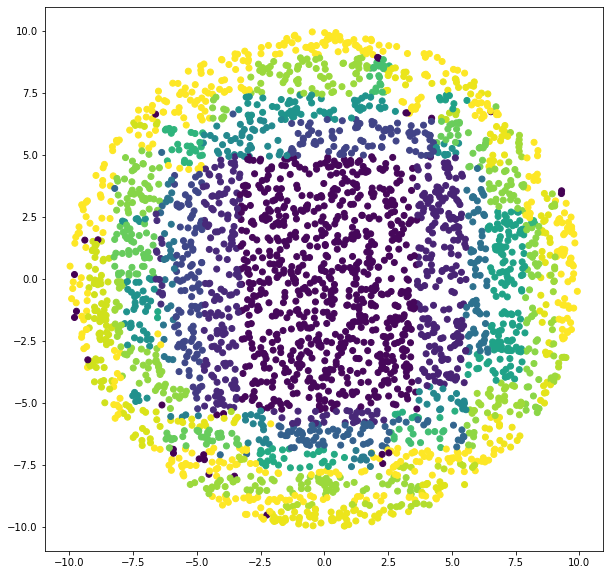

In [25]:
from sklearn.tree import DecisionTreeClassifier

#########################################
# Ваш код

basic_tree = DecisionTreeClassifier(max_depth=9)
basic_tree.fit(X_train, y_train)

predict_tree = basic_tree.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = [p[0] for p in basic_tree.predict_proba(X_test)]

#########################################

plt.figure(figsize=(10,10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_tree_proba)
plt.show()

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

Точность нашей модели 0.8278787878787879


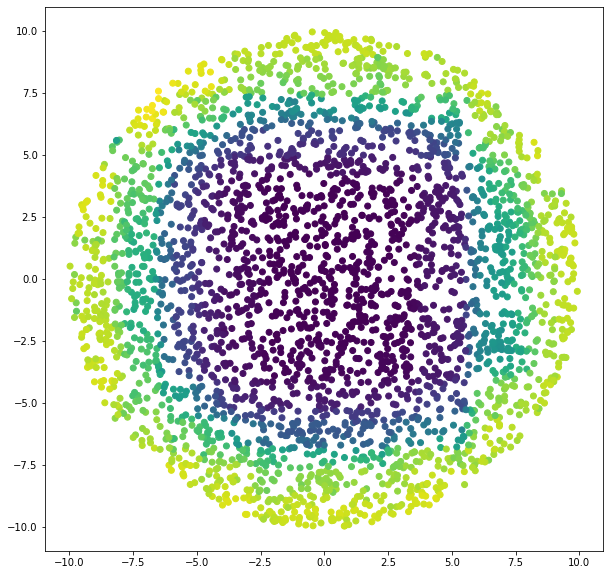

In [29]:
from sklearn.ensemble import RandomForestClassifier

#########################################
# Ваш код

basic_rf = RandomForestClassifier(n_estimators=100, max_depth=7)
basic_rf.fit(X_train, y_train)

predict_forest = basic_rf.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = [p[0] for p in basic_rf.predict_proba(X_test)]

#########################################

plt.figure(figsize=(10, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest_proba)
plt.show()

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. Смотрим на предыдущую тетрадки и копипастим все нужное сюда!

In [ ]:
# Подгружаем понравившийся фраемворк 
# Собираем сетку
# Учим и радуемся!

In [43]:
!pip install torchmetrics -q

     |████████████████████████████████| 529 kB 24.5 MB/s 


In [44]:
# импорты
import torch
import torch.nn as nn # содержит функции для реалзации архитектуры нейронных сетей
import torch.nn.functional as F # содержит различные функции активации и не только
import torch.optim as optim
import torch.utils.data as data_utils
from torchmetrics import Accuracy

In [51]:
INPUT_SIZE = 2
HIDDEN_SIZE = 25
OUTPUT_SIZE = 2
LEARNING_RATE = 1e-3
EPOCHS = 100
BATCH_SIZE = 128

In [52]:
# загрузчик данных
def create_data_loader(X_train, y_train, X_test, y_test):
    train_tensor = data_utils.TensorDataset(torch.tensor(X_train.astype(np.float32)), torch.tensor(y_train))
    train_loader = data_utils.DataLoader(dataset=train_tensor,
                                         batch_size=BATCH_SIZE,
                                         shuffle=True)

    test_tensor = data_utils.TensorDataset(torch.tensor(X_test.astype(np.float32)), torch.tensor(y_test))
    test_loader = data_utils.DataLoader(dataset=test_tensor,
                                        batch_size=BATCH_SIZE,
                                        shuffle=False)
    return train_loader, test_loader


train_loader, test_loader = create_data_loader(X_train.values, y_train.values, X_test.values, y_test.values)

In [53]:
# Модель
def build_simple_model():
    # Sequential - наборс последовательных слоёв
    model = nn.Sequential(  
        # Добавляем в нашу модель первый слой из 25 нейронов
        nn.Linear(in_features=INPUT_SIZE, out_features=HIDDEN_SIZE),
        nn.ReLU(),
        
        # Добавляем ещё один слой из 25 нейронов
        nn.Linear(in_features=HIDDEN_SIZE, out_features=HIDDEN_SIZE),
        nn.ReLU(),
        
        # Выходной вектор на количество классов, получаем с помощью такого же линейного приеобразования,
        # как и предыдущие слои, но уже на нужное количество выходных нейронов (т.е. классов)
        nn.Linear(in_features=HIDDEN_SIZE, out_features=OUTPUT_SIZE),
        nn.Softmax(),
    )

    return model

model = build_simple_model()
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=25, bias=True)
  (1): ReLU()
  (2): Linear(in_features=25, out_features=25, bias=True)
  (3): ReLU()
  (4): Linear(in_features=25, out_features=2, bias=True)
  (5): Softmax(dim=None)
)


In [54]:
# учимся
# Оптимизатор
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Функция потерь
criterion = nn.CrossEntropyLoss()

# Метрика
accuracy = Accuracy()


train_loss_values = []
train_accuracy_values = []
valid_loss_values = []
valid_accuracy = []

def run_train():
    step = 0

    # Epochs
    for epoch in range(EPOCHS):
        running_loss = []
        running_acc = []
        model.train()
        for features, label in train_loader:
            # Reset gradients
            optimizer.zero_grad()

            output = model(features)
            # Calculate error and backpropagate
            loss = criterion(output, label)
            loss.backward()
            
            # softmax_output = softmax(output)
            acc = accuracy(output, label).item()

            # Update weights with gradients
            optimizer.step()

            running_loss.append(loss.item())
            running_acc.append(acc)

            step += 1

        train_loss_values.append(np.mean(running_loss))
        train_accuracy_values.append(np.mean(running_acc))
        if epoch % 20 == 0:
            print('EPOCH %d : train_loss: %f train_acc: %f' % (epoch, train_loss_values[-1], train_accuracy_values[-1]))


        # Run validation
        running_loss = []
        running_acc = []
        model.eval()
        for features, label in test_loader:
            output = model(features)
            # Calculate error and backpropagate
            loss = criterion(output, label)
            
            # softmax_output = softmax(output)
            acc = accuracy(output, label).item()

            running_loss.append(loss.item())
            running_acc.append(acc)

        valid_loss_values.append(np.mean(running_loss))
        valid_accuracy.append(np.mean(running_acc))
        if epoch % 20 == 0:
            print('EPOCH %d : valid_loss: %f valid_acc: %f' % (epoch, valid_loss_values[-1], valid_accuracy[-1]))
        
    return train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy

In [55]:
train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy_values = run_train()

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


EPOCH 0 : train_loss: 0.658327 train_acc: 0.602032
EPOCH 0 : valid_loss: 0.639837 valid_acc: 0.656010
EPOCH 20 : train_loss: 0.467445 train_acc: 0.838859
EPOCH 20 : valid_loss: 0.471678 valid_acc: 0.836659
EPOCH 40 : train_loss: 0.465696 train_acc: 0.838390
EPOCH 40 : valid_loss: 0.469469 valid_acc: 0.837428
EPOCH 60 : train_loss: 0.464114 train_acc: 0.842356
EPOCH 60 : valid_loss: 0.470453 valid_acc: 0.838882
EPOCH 80 : train_loss: 0.464085 train_acc: 0.841954
EPOCH 80 : valid_loss: 0.469901 valid_acc: 0.836659


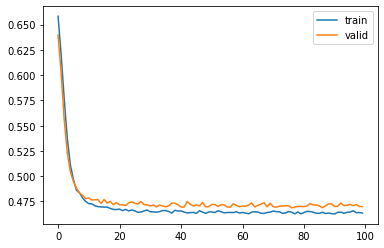

In [56]:
start = 0
plt.plot(train_loss_values[start:], label='train')
plt.plot(valid_loss_values[start:], label='valid')
plt.legend()


start = 0
plt.plot(train_accuracy_values[start:], label='train')
plt.plot(valid_accuracy_values[start:], label='valid')
plt.legend()

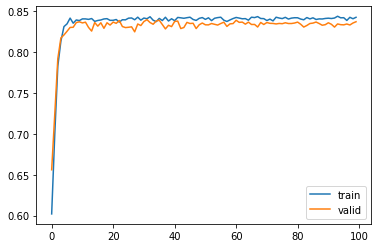

In [60]:
with torch.no_grad():
    test_scores = model(torch.tensor(X_test.values.astype(np.float32)))
predicted_classes = torch.argmax(test_scores, dim=1)
print(predicted_classes)
print(round(accuracy_score(y_test, predicted_classes), 4))

tensor([1, 1, 0,  ..., 0, 0, 1])
0.8373


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Точность нашей модели 0.8372727272727273


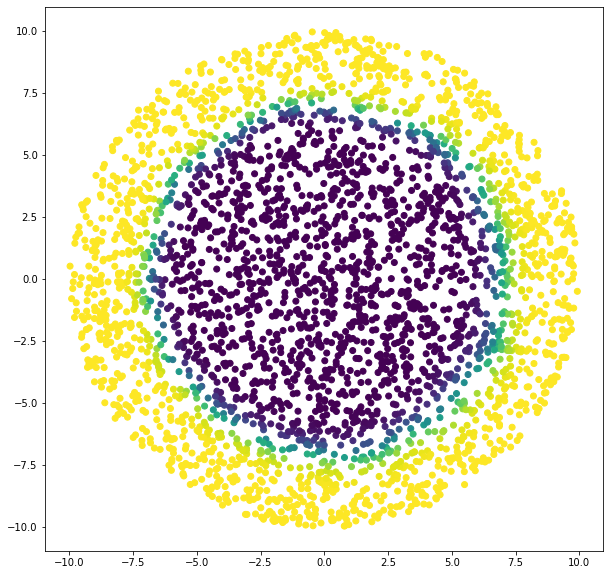

In [63]:
#########################################
# Ваш код

predict_neural = [p[0] for p in test_scores]
predict_classes = predicted_classes

print(f'Точность нашей модели {accuracy_score(predict_classes, y_test)}')
#########################################

plt.figure(figsize=(10, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_neural)
plt.show()